# Conventional Programming vs Machine Learning

In conventional programming the task is to code algorithm that take certain **input** and generates the desired **output**. These algorithms are the necesary rules and logic to achieve such a conversion. 

In the case of Machine Learning is different. We might have a list of **input** data and the desired **output**, but we don't necesary know the algorithms, rules and logic capable of achieving the required transformation. 

The task in this case is to create a `model` that can take the inputs, the expected result for each individual input value and can **learn** from them the necesary algorithms to apply to generate the desired values.

## Let's start with the simplest possible example

Imagine you need to convert temperature values in Celsius to its corresponding Fahrenheit values. The formula to achieve that is the followong:

```python
fahrenheit = celsius * 1.8 + 32
```

Since this is a simple problem to solve we wouldn't use Machine Learning but at the same time is a good candidate to understand how the process works.

Using conventional programming a function like this could be the right solution: 

```python
def cel_to_far(celsius):
    return celsius * 1.8 + 32
```

Let's assume we don't know all this, and all we have is a list of temperture values in Celsius and the corresponding values in Fahrenheit.

To solve this problem we need the following: 
1. Data in celsius and the corresponding values in Fahrenheit
2. A neural network for our model
3. Train the model
4. Evaluate the results of the model
5. Use the model to do inference

### Neural network :: just what we need for this example

A neural network is made up of Layers. Each Layer can contain one or more nwurons. The simplest neural network should have at least an input layer, where the input data will be entered and and output layer to... yes, output the resulting data of the network.

More complex networks will have more intermediate layers, also known as hidden layers.

Neurons from one layer connect to neurons on other Layers using connections. Each connection has a numeric value known as `Weight` assigned, you can think on it as how important is this connection compared to others. In addition to that, each neuron (except the ones in the input layer) has a numeric value known as `Bias`. 

### Learn how to predict Fahrenheit from Celsius

To solve our problem we will use a two layer, one neuron in each layer. These are the Input layer with one nuron to capture the input value in celsius and the Output layer to produce the calculated value in Fahrenheit. 

The way this network work is as follow: 

Given a value to the input layer neuron representing the temperature in celsius, this value is *passed* to a connected network by multiplying it by the `weigh` in the connection between the neurons; this value is then added with the `bias`; since our network only have two layers, that will our result. 

So let's assume we have 15 C, a weight of 1.8 and a bias of 4.5, the network will calculate this way:

```
15 * 1.8 = 27 + 4.5 = 31.5
```

In this example the value should be 59 but was 31.5, so not even close. The network needs to adjust the weights and the bias. At the begining of the training process these are initializes randomly and an optimization process is used to change them accordingly.

Let's use `tensorflow` and `keras` to create our model.

In [1]:
import tensorflow as tf
import numpy as np

2023-03-13 01:08:05.882422: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-13 01:08:06.651628: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-13 01:08:06.651697: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-03-13 01:08:06.651704: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

Let's now create two NumPy arrays with the date we will use to train the model

In [2]:
celsius = np.array([-40, -10, 0, 8, 15, 22, 38, 70, 12, -50], dtype=float)
fahrenheit = np.array([-40, 14, 32, 46.4, 59, 71.6, 100.4, 158, 53.6, -58], dtype=float)

Using Keras framework will help write very little code to create the network. 

The following line creates the output layer as a `Dense` layer with one neuron (`units=1`) and specify there is an input layer that will be auto-registered for us with one neuron (`input_shape=1`):

In [3]:
output_layer = tf.keras.layers.Dense(units=1, input_shape=[1])

Up to this point these layers are useless, we need a Keras model so we can pass the layers and be able to do something useful with them. There are many types of models, in this case let's use a `Sequential` model:

In [4]:
model = tf.keras.Sequential([output_layer])

2023-03-13 01:08:23.689441: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-13 01:08:23.702745: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2023-03-13 01:08:23.702771: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-03-13 01:08:23.703525: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neur

With the model ready with the network, the next step is to `compile` the model, this prepares the model to be trained. 

In [5]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

In this case two properties of the model were specified, the `Optimizer` and the `Loss function`. 

As mentioned before the optimzer is the mechanism the model will use to adjust the weight and the bias. In this case `Adam` is an optimizer allows an efficient adjustment of the values in a way that the model will always learn, improving with each iteration of the training rather than getting worse at predicting. The value of `0.1` is the learning rate the optimizer will use to adjust the values: if the rate is too small the model could learn very slowly it too hight, maybe the adjustments are not granular enough to achieve the desired accuracy.

The loss function used is *Mean squared error*, this function considers a small amount of big error is worse than a large amount of small errors.

With the model ready and compiled, it is time to train the model. To do that let's use the `fit()` method from the model and pass it the training data, this is: the temperature values in celsius and the expected values in Fahrenheit and how many times the dataset should be attempted: `epoch`. One attempt means going over all the training data. Let's start with 1000 to give it time to optimize itself. 

In [6]:
%%time
hist = model.fit(celsius, fahrenheit, epochs=1000, verbose=False)

CPU times: user 2.23 s, sys: 48.9 ms, total: 2.28 s
Wall time: 1.88 s


Before predicting, let's check the results of the loss function so we can see the quality of the results in the network on each epoch.

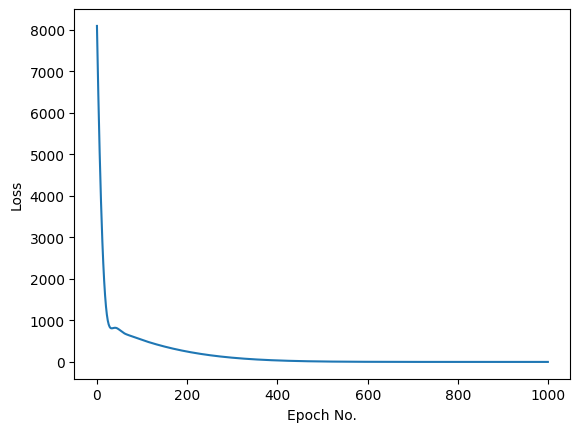

In [7]:
import matplotlib.pyplot as plt

plt.xlabel('Epoch No.')
plt.ylabel('Loss')
plt.plot(hist.history["loss"])

This plot shows that after epoch 500 the model was already trained and didn't improve much after that.

Let's use our trained model to make a prediction and for that let's use a value that was not used during the training: 100 C

In [8]:
model.predict([100.0])

1/1 [==============================] - 0s 58ms/step


array([[211.98155]], dtype=float32)

In [9]:
output_layer.get_weights()

[array([[1.8002522]], dtype=float32), array([31.956333], dtype=float32)]

In this very simple example the operation performed by the network is identical to the operation that's required, that's a lineal equation with the form `y = mx + n`. You can notice how the model adjusted the weight to a value very close to **1.8** and the bias to a value very close to **32**. 

Let now see what happens with a more complex network with 4 layers and 3 neurons each. 

In [10]:
hid1 = tf.keras.layers.Dense(units=3, input_shape=[1])
hid2 = tf.keras.layers.Dense(units=3)
output_layer = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([hid1, hid2, output_layer])

In [11]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

In [12]:
%%time
hist = model.fit(celsius, fahrenheit, epochs=1000, verbose=False)

CPU times: user 2.45 s, sys: 151 ms, total: 2.6 s
Wall time: 2.09 s


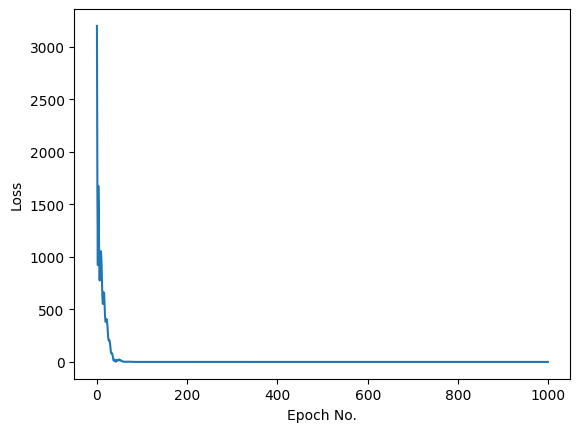

In [13]:
plt.xlabel('Epoch No.')
plt.ylabel('Loss')
plt.plot(hist.history["loss"])

In [14]:
model.predict([100])

1/1 [==============================] - 0s 53ms/step


array([[211.99998]], dtype=float32)

In [15]:
hid1.get_weights()

[array([[-0.06080123, -0.51609784, -0.49676725]], dtype=float32),
 array([-3.4922094, -3.7407734, -3.809751 ], dtype=float32)]

In [16]:
hid2.get_weights()

[array([[ 0.17785463,  0.9215401 ,  0.8370538 ],
        [ 0.05475621,  0.6509678 ,  0.9109543 ],
        [-0.41336355,  1.1629684 ,  0.23713875]], dtype=float32),
 array([ 3.3237627, -3.729958 , -3.610308 ], dtype=float32)]

In [17]:
output_layer.get_weights()

[array([[ 0.26311773],
        [-0.92175245],
        [-1.349967  ]], dtype=float32),
 array([3.5555723], dtype=float32)]